## importing necessory libraries

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set(style="whitegrid", palette="muted")


### Reading csv File

In [2]:
df = pd.read_csv('EDA_MCDF.csv')
df.head()

,District_Name,Market_Name,Variety,Group,Arrivals_Tonnes,Min_Price_Per_Quintal,Max_Price_Per_Quintal,Average_Price_Per_Quintal,Report_Date
0,Kolhapur,Vadgaonpeth,Beans,Pulses,0.3,2000,3500,2800,2025-03-23
1,Kolhapur,Vadgaonpeth,Beans,Pulses,0.3,2500,2800,2600,2025-08-19
2,Kolhapur,Vadgaonpeth,Beans,Pulses,0.3,2800,3500,3000,2025-06-03
3,Kolhapur,Vadgaonpeth,Beans,Pulses,0.3,2800,3500,3000,2025-04-12
4,Kolhapur,Vadgaonpeth,Beans,Pulses,0.3,2800,3500,3000,2025-01-30


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6807 entries, 0 to 6806
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   District_Name              6807 non-null   object 
 1   Market_Name                6807 non-null   object 
 2   Variety                    6807 non-null   object 
 3   Group                      6807 non-null   object 
 4   Arrivals_Tonnes            6807 non-null   float64
 5   Min_Price_Per_Quintal      6807 non-null   int64  
 6   Max_Price_Per_Quintal      6807 non-null   int64  
 7   Average_Price_Per_Quintal  6807 non-null   int64  
 8   Report_Date                6807 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 478.7+ KB


In [39]:
df['Market_Name'].unique()

array(['Vadgaonpeth', 'Manchar', 'Nasik', 'Kalyan', 'Rahata',
       'Chattrapati Sambhajinagar', 'Chandrapur(Ganjwad)', 'Rahuri',
       'Kolhapur', 'Chandrapur', 'Rahuri(Songaon)', 'Lasalgaon(Vinchur)',
       'Paithan'], dtype=object)

In [40]:
df['Variety'].unique()

array(['Beans', 'Brinjal', 'Cabbage', 'Garlic', 'Onion', 'Red', 'Potato',
       'Tomato', 'Local'], dtype=object)

## Renaming Market And District names

In [3]:
df['Market_Name'] = df['Market_Name'].replace({'Nashik(Panchavti)':'Nashik','Chandrapur(Ganjwad)':'Chandrapur','Rahuri(Songaon)':'Rahuri','Chattrapati Sambhajinagar':'Sambhajinagar','Lasalgaon(Vinchur)':'Lasalgaon'})
df['Variety'] = df['Variety'].replace({'Red': 'Carrot', 'Local': 'Capsicum'})
df['District_Name'] = df['District_Name'].replace({'Chattrapati Sambhajinagar': 'Sambhajinagar'})


## converting Report Date column to datetime

In [4]:
df['Report_Date'] = pd.to_datetime(
    df['Report_Date'].str.strip(),  # remove extra spaces
    format="%d %b %Y",  # example: "03 Jun 2025"
    errors="coerce"     # still gives NaT if mismatch
)

# Steps Involved in Exploratory Data Analysis

### 1.Univariate Analysis

A. Discrete Data (i.e. Categorical or Numerical Discrete Columns)
- Statistical Non Visual Analysis
    - Purpose: Helps us describe and summarize the data
    - count, nunique, unique, value_counts
- Visual Analysis
    - Purpose: Helps us understand how the data is distributed and Outliers
    - Bar/Count Plot

B. Continuous Numerical Data (i.e. Real Numerical) - Statistical Non Visual Analysis - Purpose: Helps us describe and summarize the data - min, max, sum, mean, median, var, std, range, iqr - Visual Analysis - Purpose: Helps us understand the Distribution of data and Outliers - Histogram Plot, KDE Plot and Box Plot

### 2.Bivariate Analysis (Purpose - Helps identify the relationships)
A. Continuous Numerical vs Continuous Numerical Data
- Statistical Non Visual Analysis
    - Purpose: Is there any relationship between two variables - Linear or non Linear relationship?
    - Pearson Correlation Coefficient
- Visual Analysis
    - Scatter Plot


B. Continuous Numerical vs Discrete Data - Statistical Non Visual Analysis - Purpose: How many discrete groups are there and Are the individuals in the groups independent or dependent? - Compare the Mean, Median, Std of the groups - Visual Analysis - Box Plots and Histogram Plots

C. Discrete vs Discrete Data - Statistical Non Visual Analysis - Purpose: Are the individuals in the groups independent or dependent? - Cross Tabs (i.e. Frequency Tables) - Visual Analysis - Stacked Bar Plot, Unstacked Bar Plot

## 1. Univariate Analysis - `Statistical Non Visual Analysis`

In [10]:
categorical_df = df.select_dtypes(include=['object']) #selects the columns of objects datatypes(categorical)

In [11]:
numerical_df = df.select_dtypes(include=['int64', 'float64']) # selects the columns of numeric datatype -> int & floats

In [12]:
def categorical_univariate_analysis(categaorical_data):
    for col_name in categaorical_data:
        print('*'*10, col_name, '*'*10)
        print(categaorical_data[col_name].agg(['count','nunique','unique']))
        print('Value Counts:\n',categaorical_data[col_name].value_counts())
        print()
        print()

In [13]:
categorical_univariate_analysis(categorical_df)

********** District_Name **********
count                                                   6807
nunique                                                    7
unique     [Kolhapur, Pune, Nashik, Thane, Ahmednagar, Sa...
Name: District_Name, dtype: object
Value Counts:
 District_Name
Nashik           1622
Sambhajinagar    1180
Thane            1131
Pune              923
Kolhapur          691
Ahmednagar        671
Chandrapur        589
Name: count, dtype: int64


********** Market_Name **********
count                                                   6807
nunique                                                   11
unique     [Vadgaonpeth, Manchar, Nasik, Kalyan, Rahata, ...
Name: Market_Name, dtype: object
Value Counts:
 Market_Name
Nasik            1450
Kalyan           1131
Sambhajinagar    1109
Manchar           923
Chandrapur        589
Vadgaonpeth       546
Rahata            537
Lasalgaon         172
Kolhapur          145
Rahuri            134
Paithan            71
Name: count, dty

In [14]:
def numerical_univariate_analysis(numerical_data):
    for col_name in numerical_data:
        print('*'*10, col_name, '*'*10)
        print(numerical_data[col_name].agg(['min','max','sum','mean','median','var','std']))
        print()
        print()

In [15]:
numerical_univariate_analysis(numerical_df)

********** Arrivals_Tonnes **********
min            0.100000
max         4026.000000
sum       480849.100000
mean          70.640385
median         5.700000
var        49517.794650
std          222.525942
Name: Arrivals_Tonnes, dtype: float64


********** Min_Price_Per_Quintal **********
min       1.000000e+02
max       2.500000e+04
sum       1.272348e+07
mean      1.869175e+03
median    1.200000e+03
var       5.080155e+06
std       2.253920e+03
Name: Min_Price_Per_Quintal, dtype: float64


********** Max_Price_Per_Quintal **********
min       2.000000e+02
max       1.050000e+05
sum       2.232908e+07
mean      3.280312e+03
median    2.000000e+03
var       1.590027e+07
std       3.987514e+03
Name: Max_Price_Per_Quintal, dtype: float64


********** Average_Price_Per_Quintal **********
min       1.500000e+02
max       2.800000e+04
sum       1.739740e+07
mean      2.555810e+03
median    1.600000e+03
var       7.899128e+06
std       2.810539e+03
Name: Average_Price_Per_Quintal, dtype: flo

In [16]:
df.columns

Index(['District_Name', 'Market_Name', 'Variety', 'Group', 'Arrivals_Tonnes',
       'Min_Price_Per_Quintal', 'Max_Price_Per_Quintal',
       'Average_Price_Per_Quintal', 'Report_Date'],
      dtype='object')

In [17]:
df.dtypes

District_Name                        object
Market_Name                          object
Variety                              object
Group                                object
Arrivals_Tonnes                     float64
Min_Price_Per_Quintal                 int64
Max_Price_Per_Quintal                 int64
Average_Price_Per_Quintal             int64
Report_Date                  datetime64[ns]
dtype: object

## Univariate - Visual Analysis

## Numerical Column

array([[<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>]],
      dtype=object)

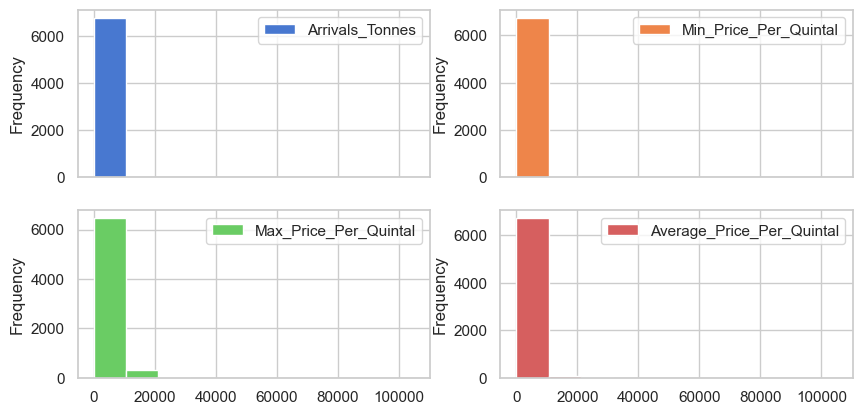

In [10]:
df.plot(kind='hist', subplots=True, layout=(4, 2), figsize=(10, 10))

Arrivals_Tonnes                 Axes(0.125,0.712609;0.352273x0.167391)
Min_Price_Per_Quintal        Axes(0.547727,0.712609;0.352273x0.167391)
Max_Price_Per_Quintal           Axes(0.125,0.511739;0.352273x0.167391)
Average_Price_Per_Quintal    Axes(0.547727,0.511739;0.352273x0.167391)
dtype: object

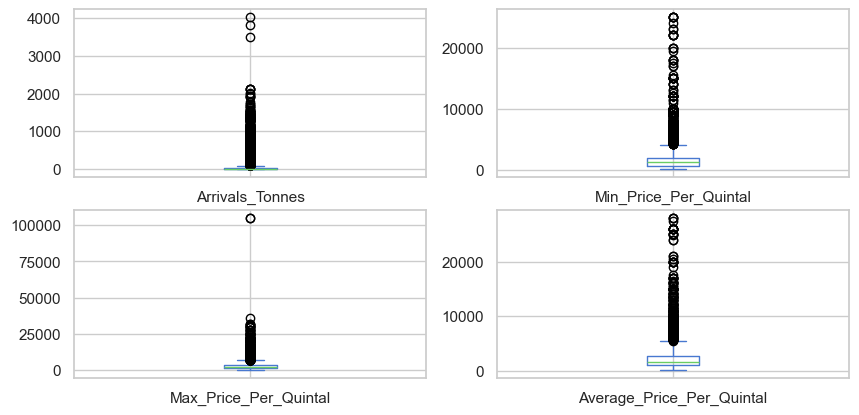

In [11]:
df.plot(kind='box', subplots=True, layout=(4, 2), figsize=(10, 10))

## Categorical Columns

## District wise highest and lowest Record

C:\Users\chava\AppData\Local\Temp\ipykernel_11140\2647450698.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


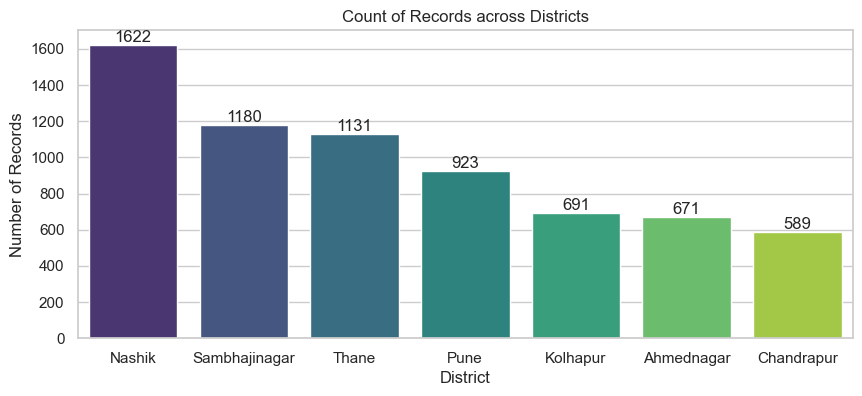

In [7]:
plt.figure(figsize=(10,4))

# Countplot with sorted order
ax = sns.countplot(
    x="District_Name", 
    data=df, 
    order=df["District_Name"].value_counts().index,
    palette="viridis"
)
for i in ax.containers:
    ax.bar_label(i)
    
plt.xticks(rotation=False)
plt.title("Count of Records across Districts")
plt.xlabel("District")
plt.ylabel("Number of Records")
plt.show()

### Obervation
- Nashik has the highest number of records (1622), showing it is a major trading hub.
- High record counts (like Nashik & Sambhajinagar) → Indicate strong market connectivity, higher trading frequency, and better chances for price discovery.

##  Market wise highest and lowest Records


C:\Users\chava\AppData\Local\Temp\ipykernel_11140\729115743.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = 'Market_Name', data = df, order = df['Market_Name'].value_counts().index,palette = 'viridis')


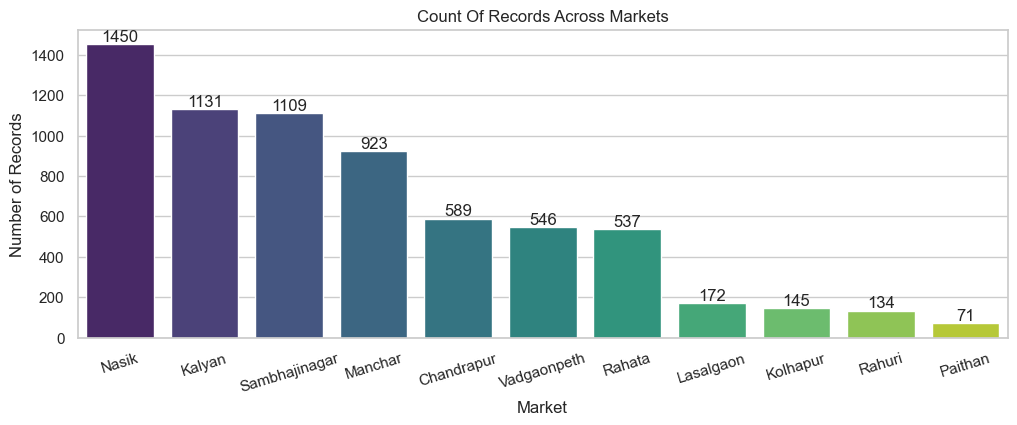

In [6]:
plt.figure(figsize=(12,4))

ax = sns.countplot(x = 'Market_Name', data = df, order = df['Market_Name'].value_counts().index,palette = 'viridis')

for i in ax.containers:
    ax.bar_label(i)

plt.xticks(rotation = 17)
plt.title('Count Of Records Across Markets')
plt.xlabel('Market')
plt.ylabel('Number of Records')
plt.show()

### Observation
- Nashik is the most active market with maximum records.
- Kalyan and Sambhajinagar also show high participation.
- Smaller markets like Paithan and Rahuri show low activity.

## Variety wise highest record

<Axes: ylabel='count'>

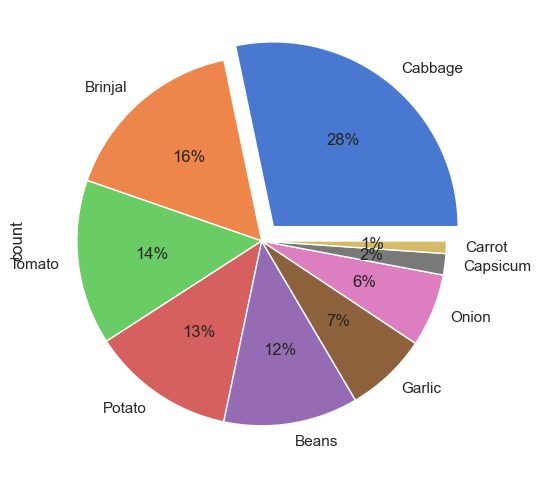

In [30]:
###Variety
plt.figure(figsize=(10,6))
df["Variety"].value_counts().plot(kind="pie", autopct="%1.f%%",explode = [0.1,0,0,0,0,0,0,0,0])


## Obervation
- Crops like Cabbage, Brinjal, Tomato, and Potato dominate markets → more competition, but stable demand.
- Crops like Capsicum and Carrot show low market share → can be profitable niche opportunities if demand grows.
- Farmers can use this to balance between mass crops (for stability) and niche crops (for higher margins).

## Group (commodity group)

C:\Users\chava\AppData\Local\Temp\ipykernel_13012\996629592.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


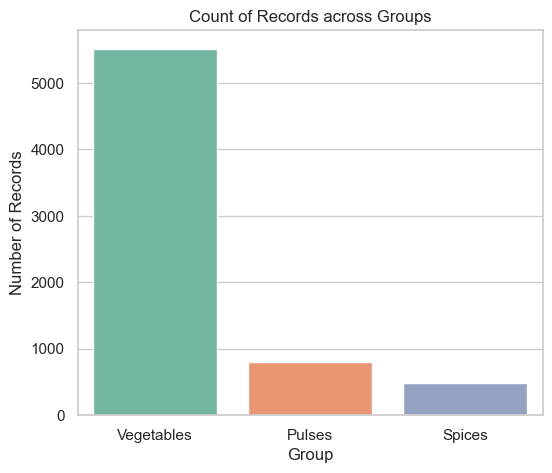

In [4]:
## Group (commodity group)
plt.figure(figsize=(6,5))

# Countplot with sorted order
ax = sns.countplot(
    x="Group", 
    data=df, 
    order=df["Group"].value_counts().index,
    palette="Set2"
)


plt.title("Count of Records across Groups")
plt.xlabel("Group")
plt.ylabel("Number of Records")
plt.show()

Observations

Vegetables dominate

With more than 5,500 records, vegetables clearly form the largest portion of the dataset.

This suggests most market arrivals and price records are for vegetables.

Pulses are much fewer

Around 800 records only, showing much less reporting compared to vegetables.

Indicates limited coverage or lower arrival frequency.

Spices have the least data

Around 500 records, making them the smallest category in the dataset.

This could mean spices are either niche crops in these markets or less frequently traded.

<Axes: ylabel='count'>

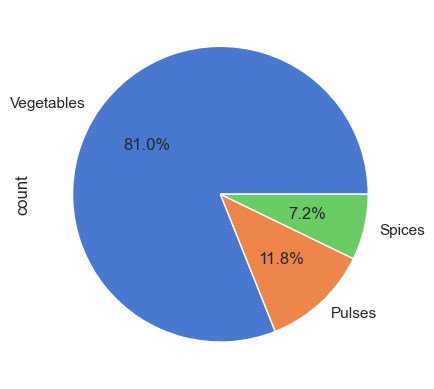

In [44]:
df["Group"].value_counts().plot(kind="pie",autopct="%1.1f%%")

In [58]:
df.dtypes

District_Name                        object
Market_Name                          object
Variety                              object
Group                                object
Arrivals_Tonnes                     float64
Min_Price_Per_Quintal                 int64
Max_Price_Per_Quintal                 int64
Average_Price_Per_Quintal             int64
Report_Date                  datetime64[ns]
dtype: object

In [54]:
df["Report_Date"] = pd.to_datetime(df["Report_Date"], format="%Y-%m-%d", errors="coerce")

In [56]:
print(df["Report_Date"].dtype)

datetime64[ns]


## Monthly Reporting Trend

<Axes: title={'center': 'Records Reported per Month'}, xlabel='Report_Date'>

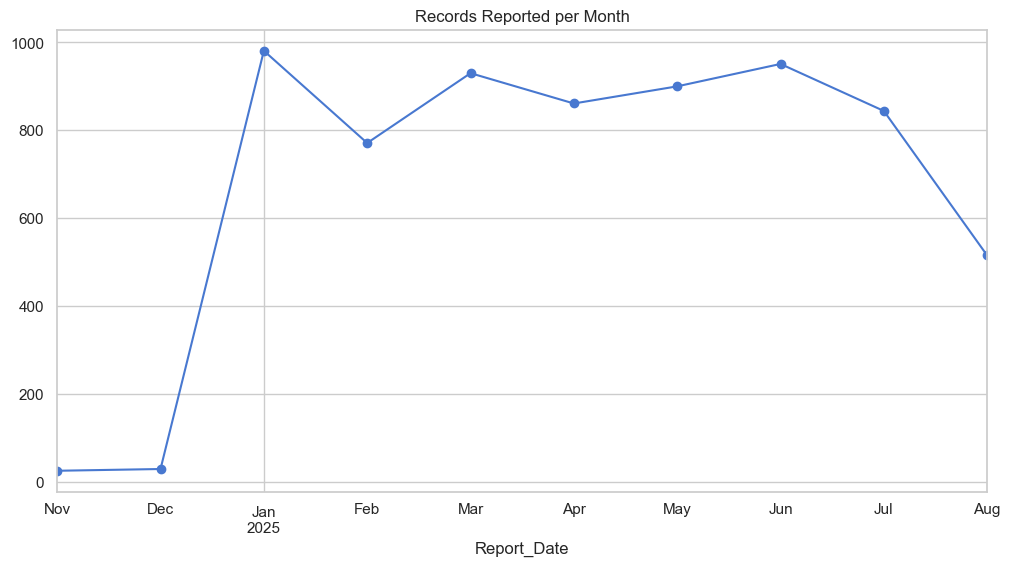

In [60]:
monthly_counts = (
    df["Report_Date"]
    .dt.to_period("M")
    .value_counts()
    .sort_index()
)

# convert PeriodIndex → Timestamp for plotting
monthly_counts.index = monthly_counts.index.to_timestamp()

monthly_counts.plot(
    kind="line",
    figsize=(12,6),
    marker="o",
    title="Records Reported per Month",
    grid = True
)

Here are the observations from the line chart:

Data Starts Around Nov–Dec 2024 → Very few records are available before 2025 (just a handful in Nov & Dec).

Sharp Increase in Jan 2025 → The number of records jumps drastically in January (~980 records).

Fluctuation but High Activity (Feb–Jun 2025)

Feb dips slightly (~770 records).

Mar to Jun maintains a strong trend (850–960 records).

Peak is in June 2025 (~950 records).

Decline in Jul–Aug 2025 → The number of records falls after June, with August showing a noticeable drop (~520 records).

Overall Trend → Records peak early in 2025, remain high through mid-year, then decline toward August.

# 2. Bivariate analysis

In [34]:
df.head()

,District_Name,Market_Name,Variety,Group,Arrivals_Tonnes,Min_Price_Per_Quintal,Max_Price_Per_Quintal,Average_Price_Per_Quintal,Report_Date
0,Kolhapur,Vadgaonpeth,Beans,Pulses,0.3,2000,3500,2800,2025-03-23
1,Kolhapur,Vadgaonpeth,Beans,Pulses,0.3,2500,2800,2600,2025-08-19
2,Kolhapur,Vadgaonpeth,Beans,Pulses,0.3,2800,3500,3000,2025-06-03
3,Kolhapur,Vadgaonpeth,Beans,Pulses,0.3,2800,3500,3000,2025-04-12
4,Kolhapur,Vadgaonpeth,Beans,Pulses,0.3,2800,3500,3000,2025-01-30


## 1.Categorical Vs Categorical
**Goal:** Compare frequency distribution across two categorical variables.

In [60]:
## Cross Tabulation -> district name and group
pd.crosstab(df['District_Name'], df['Group'])

Group,Pulses,Spices,Vegetables
District_Name,,,
Ahmednagar,159,0,512
Chandrapur,0,124,465
Kolhapur,106,0,585
Nashik,223,177,1222
Pune,152,23,748
Sambhajinagar,0,0,1180
Thane,161,165,805


In [61]:
## Cross Tabulation market name and variety
pd.crosstab(df['Market_Name'], df['Variety'])

Variety,Beans,Brinjal,Cabbage,Capsicum,Carrot,Garlic,Onion,Potato,Tomato
Market_Name,,,,,,,,,
Chandrapur,0,110,93,0,0,124,0,140,122
Kalyan,161,161,322,0,0,165,0,159,163
Kolhapur,0,0,145,0,0,0,0,0,0
Lasalgaon,0,0,0,0,73,0,99,0,0
Manchar,152,151,320,0,0,23,164,0,113
Nasik,223,220,442,0,0,177,0,178,210
Paithan,0,0,0,0,1,0,70,0,0
Rahata,159,0,0,0,0,0,0,189,189
Rahuri,0,0,134,0,0,0,0,0,0


### observation
- Nasik, Kalyan, Manchar, Sambhajinagar are major hubs with diverse crop presence.
- Kolhapur, Rahuri, Lasalgaon, Paithan are niche/specialized markets.
- Cabbage, Beans, Tomato, Onion are the most prominent varieties across markets.
- Garlic appears in only a few markets (not widely distributed).

## which markets are strong in which varieties
- heatmap (to show intensity per market–variety)

<Figure size 1200x800 with 0 Axes>

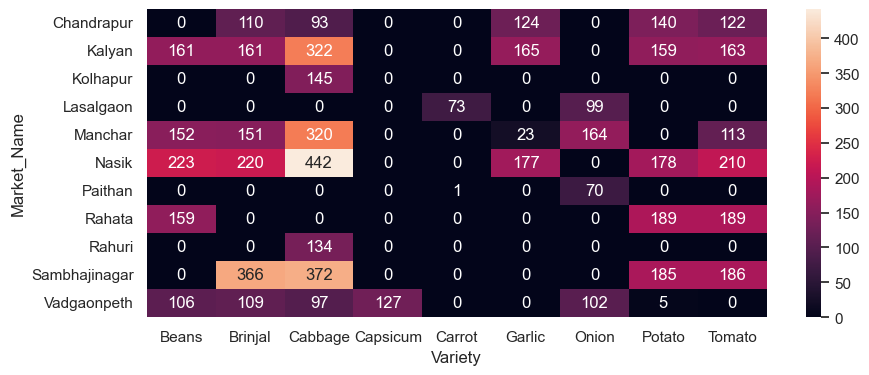

In [13]:
# Assuming your crosstab is stored in a variable called cross_tab
plt.figure(figsize=(12,8))
cross_tab = pd.crosstab(df['Market_Name'], df['Variety'])

plt.figure(figsize=(10,4))
sns.heatmap(cross_tab, annot=True, fmt="d")

# plt.title("Market vs Variety - Cross Tabulation (Heatmap)")
# plt.ylabel("Market Name")
# plt.xlabel("Variety")
plt.show()

### Observation: same as above crosstable

# Stacked Bar Chart
## composition of varieties in each market (who is dominant, who is secondary).

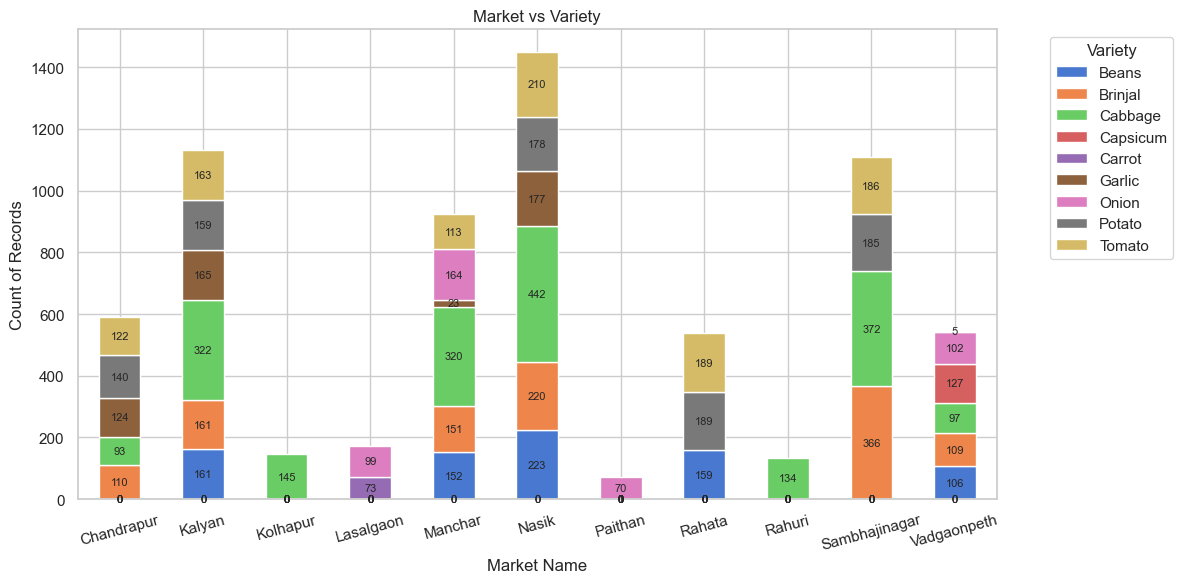

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# creating the crosstab
cross_tab = pd.crosstab(df['Market_Name'], df['Variety'])

# Plot the stacked bar chart
ax = cross_tab.plot(kind="bar", stacked=True, figsize=(12,6))

# Add labels to each slice
for container in ax.containers:
    # Only label slices with non-zero height
    ax.bar_label(container, label_type='center', fontsize=8)

# Chart formatting
plt.title("Market vs Variety")
plt.ylabel("Count of Records")
plt.xlabel("Market Name")
plt.legend(title="Variety", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


## Observation
- Nasik is the central hub for almost every crop, making it the most diversified and dominant market.
- Kalyan, Sambhajinagar, Manchar are also major markets with multi-crop dominance.
- Kolhapur, Rahuri, Lasalgaon are specialized markets focusing on 1–2 crops only.
- Cabbage, Beans, Tomato, Onion are the top four crops across Maharashtra markets.

# 2.Categorical vs Numerical

**Goal:** Compare distributions of numerical values across categories.

In [79]:
## GroupBy + Aggregation
## average per quintal prize for all varieties
df.groupby("Variety")["Average_Price_Per_Quintal"].mean().sort_values()

Variety
Capsicum    1118.110236
Tomato      1269.776195
Cabbage     1293.952727
Potato      1609.467290
Onion       1702.358621
Carrot      1996.081081
Brinjal     2566.141450
Beans       4707.268414
Garlic      9434.570552
Name: Average_Price_Per_Quintal, dtype: float64

## Average Arrivals in Tonnes by variety

C:\Users\chava\AppData\Local\Temp\ipykernel_11020\1922535218.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


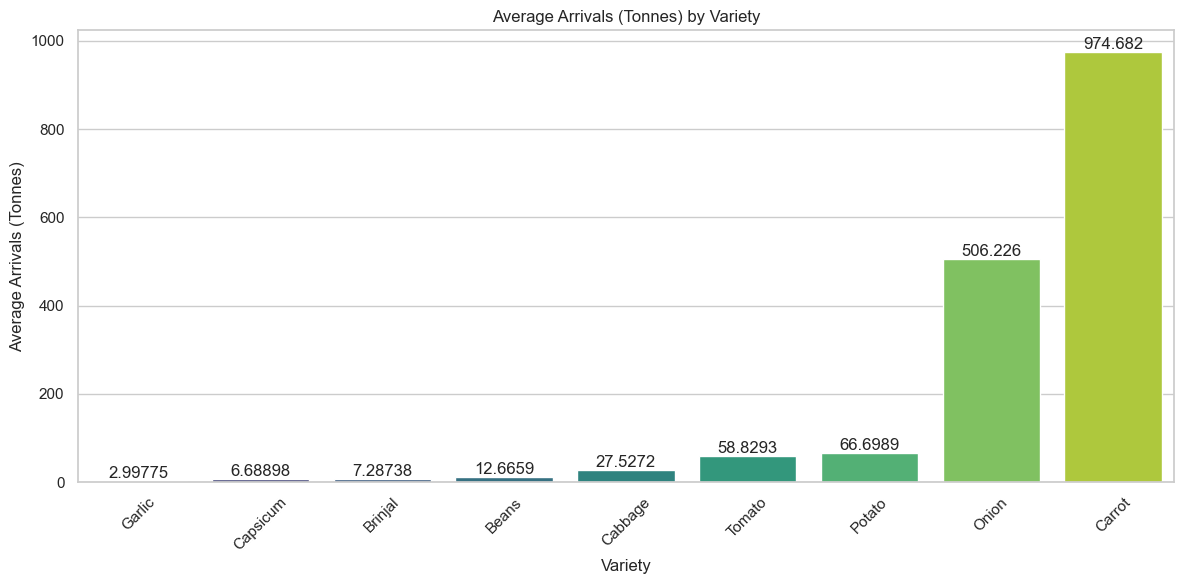

In [17]:
# Prepare grouped data
avg_arrivals = (
    df.groupby("Variety")["Arrivals_Tonnes"]
    .mean()
    .reset_index()
    .sort_values(by="Arrivals_Tonnes", ascending=True)  # keep same order as your code
)

# Plot using seaborn
plt.figure(figsize=(12,6))
ax = sns.barplot(
    data=avg_arrivals,
    x="Variety",
    y="Arrivals_Tonnes",
    palette="viridis"
)
for i in ax.containers:
    ax.bar_label(i)
    
plt.title("Average Arrivals (Tonnes) by Variety")
plt.xlabel("Variety")
plt.ylabel("Average Arrivals (Tonnes)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [40]:
df['Variety'].value_counts()

Variety
Cabbage     1925
Brinjal     1117
Tomato       983
Potato       856
Beans        801
Garlic       489
Onion        435
Capsicum     127
Carrot        74
Name: count, dtype: int64

## Variety vs Min/Max/Average Price
**Why:** Identify safe vs risky markets.

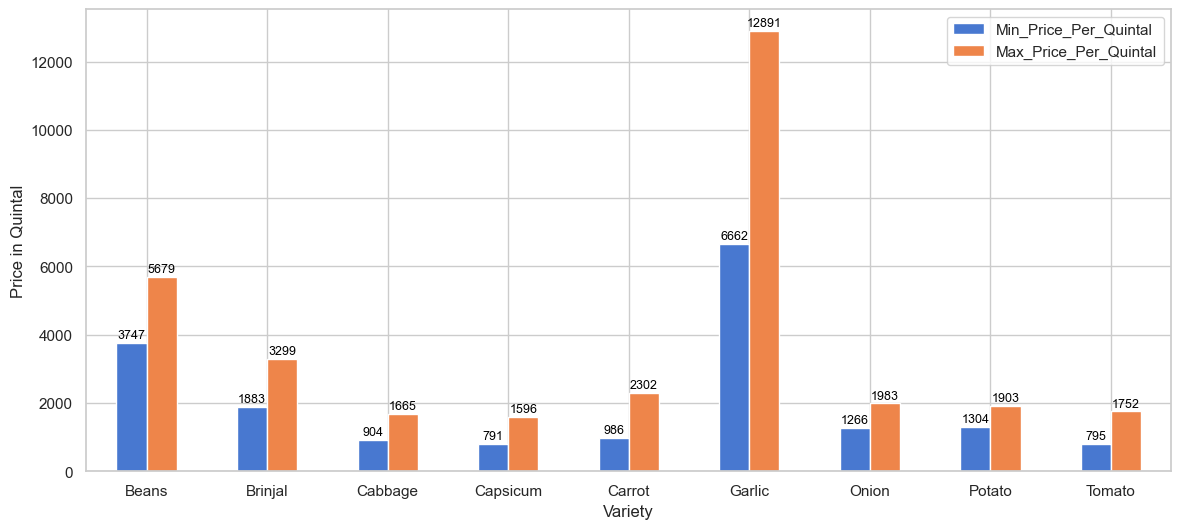

In [54]:
ax = df.groupby("Variety")[["Min_Price_Per_Quintal","Max_Price_Per_Quintal"]] \
       .mean() \
       .plot(kind="bar", figsize=(14,6))

# Add numbers on bars
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,  # X position (center of bar)
        height + 50,                    # Y position (slightly above bar)
        f"{height:.0f}",                # Format number (no decimals)
        ha="center", va="bottom", fontsize=9, color="black"
    )
plt.ylabel('Price in Quintal')
plt.xticks(rotation = False)
plt.show()

# 3.Numerical vs Numerical
**Goal:** Study relationships and correlation between numerical variables.

## Statistical Distribution of Average Prices

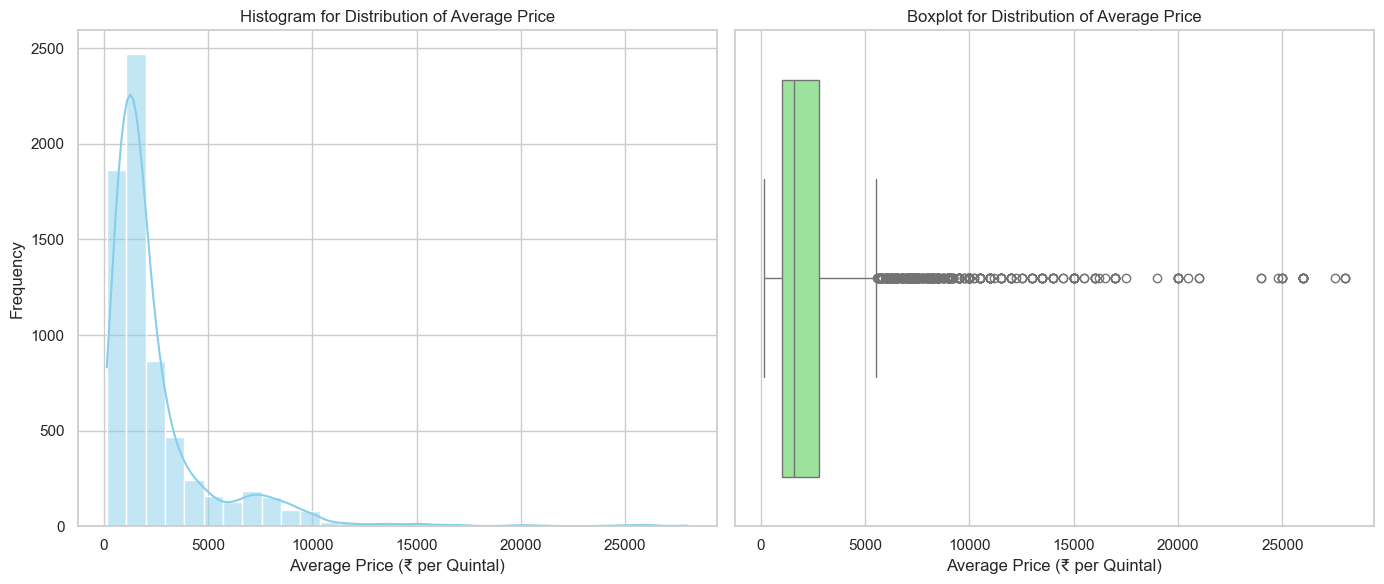

In [11]:
plt.figure(figsize=(14,6))

# Histogram
plt.subplot(1,2,1)
sns.histplot(df["Average_Price_Per_Quintal"], bins=30, kde=True, color="skyblue")
plt.title("Histogram for Distribution of Average Price")
plt.xlabel("Average Price (₹ per Quintal)")
plt.ylabel("Frequency")

# Boxplot
plt.subplot(1,2,2)
sns.boxplot(x=df["Average_Price_Per_Quintal"], color="lightgreen")
plt.title("Boxplot for Distribution of Average Price")
plt.xlabel("Average Price (₹ per Quintal)")

plt.tight_layout()
plt.show()

### Observation
- Most crops are sold at ₹500–₹3000 per quintal (common price range).
- Few crops reach very high prices, but these are rare cases.
- Prices are uneven and unstable, with many sudden highs and lows (outliers).

## Arrivals vs Average Price

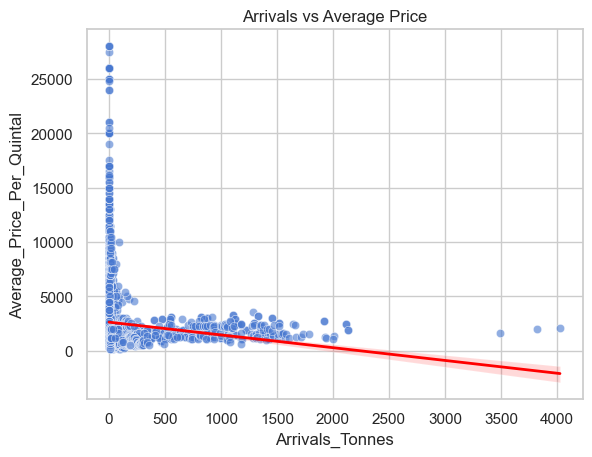

In [18]:
## Scatter Plot
sns.scatterplot(x="Arrivals_Tonnes", y="Average_Price_Per_Quintal", data=df, alpha=0.6)
sns.regplot(
    x="Arrivals_Tonnes",
    y="Average_Price_Per_Quintal",
    data=df,
    scatter=False,   # so it doesn’t duplicate points
    color="red",
    line_kws={"linewidth":2}
)
plt.title("Arrivals vs Average Price")
plt.show()

## observation
- Negative relation: As supply (arrivals) increase, prices drop — confirming the supply-demand rule.
- Low arrivals → High prices: When arrivals are low, prices rise sharply due to scarcit.
- High arrivals → Stable prices: More supply brings price stability and less variation
- Farmer insight: Avoid selling when everyone else does; timing sales better can increase profit.

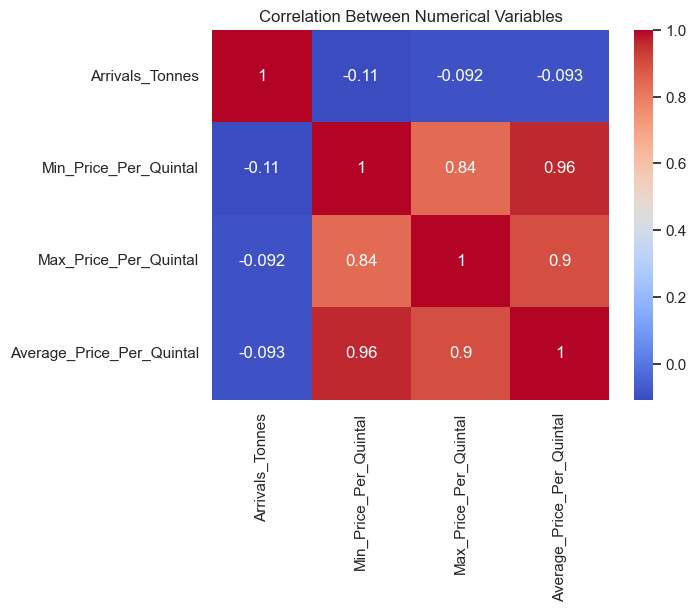

In [93]:
## Correlation Heatmap
corr = df[["Arrivals_Tonnes","Min_Price_Per_Quintal","Max_Price_Per_Quintal","Average_Price_Per_Quintal"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Between Numerical Variables")
plt.show()


### Observation
- Garlic dominates the market in terms of price and volatility.
- Beans and Brinjal follow as mid-range crops.
- Onion, Potato, and Tomato are staple crops with moderate and stable price ranges.
- Cabbage, Capsicum, and Carrot are the cheapest with lower volatility.

## 4.Variety vs Average_Price_Per_Quintal
**Note:** Compare crop varieties.

Text(0.5, 1.0, 'Price Distribution across Varieties')

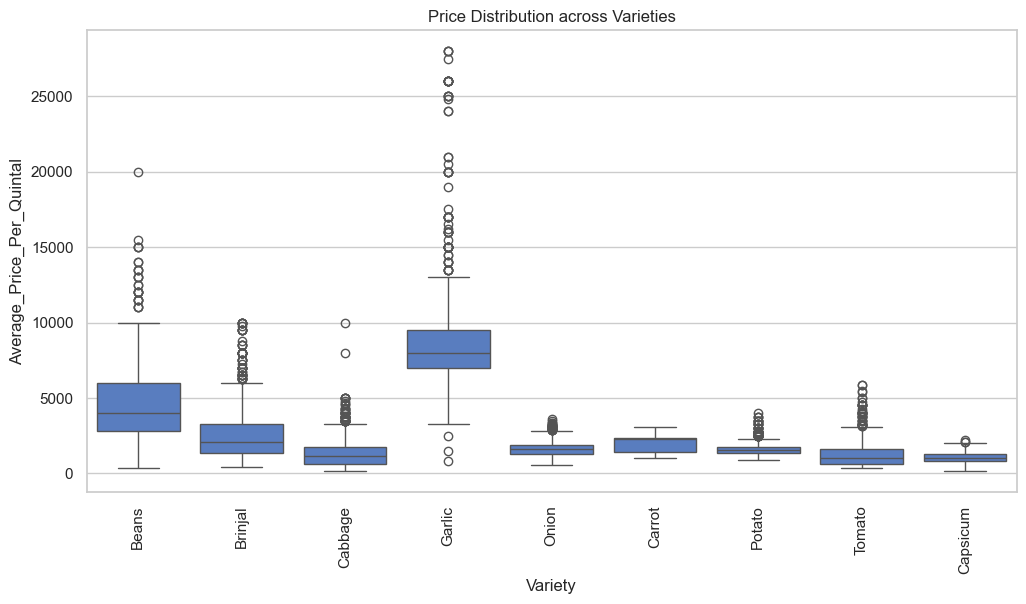

In [48]:
plt.figure(figsize=(12,6))
sns.boxplot(x="Variety", y="Average_Price_Per_Quintal", data=df)
plt.xticks(rotation=90)
plt.title("Price Distribution across Varieties")

## Observation
- Garlic and Beans are the most expensive and volatile vegetables.
- Brinjal and Cabbage are on the cheaper side but still show occasional price spikes.
- Onion, Potato, Carrot, Capsicum have relatively stable prices.
- Tomato is usually low-priced but highly unstable due to seasonal fluctuations.

## Multivariate Analysis

### 1.Relationship Between Arrivals, Prices, and Districts
- Show how supply affects prices differently across districts.
- Farmers can identify which districts give better prices even when supply is high.

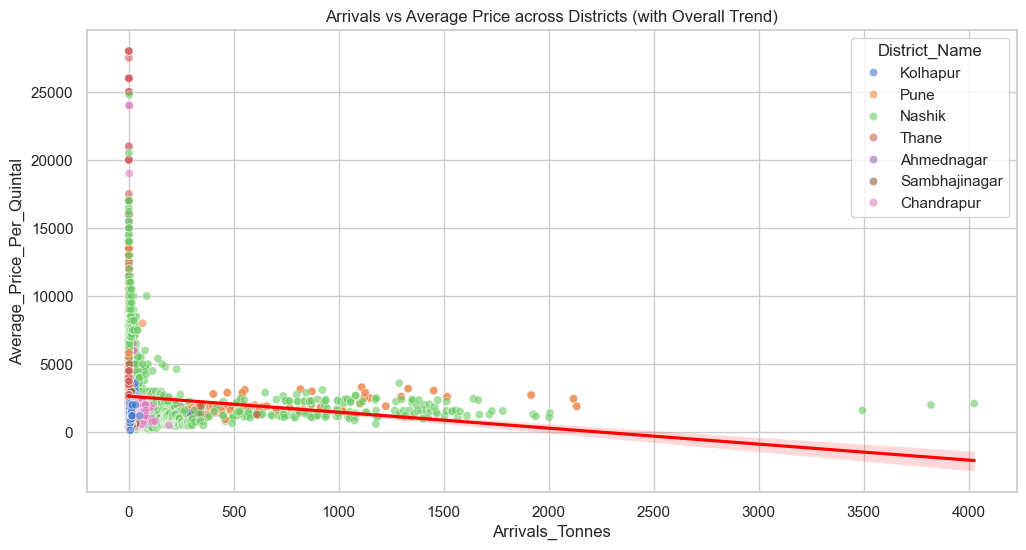

In [46]:
plt.figure(figsize=(12,6))

# Scatter with hue for districts
sns.scatterplot(data=df, 
                x="Arrivals_Tonnes", 
                y="Average_Price_Per_Quintal", 
                hue="District_Name", 
                alpha=0.6)

# Add one overall regression line
sns.regplot(data=df, 
            x="Arrivals_Tonnes", 
            y="Average_Price_Per_Quintal", 
            scatter=False, 
            color="red")

plt.title("Arrivals vs Average Price across Districts (with Overall Trend)")
plt.show()


## oservation
- When more produce (higher arrivals) comes to the market, prices usually fall.
- When supply is low, prices show big variations and can even go very high.
- Districts like Pune and Nashik bring larger arrivals, but the same trend holds everywhere: more supply → lower price.
- This clearly shows the basic supply-demand effect in agricultural markets.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6807 entries, 0 to 6806
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   District_Name              6807 non-null   object 
 1   Market_Name                6807 non-null   object 
 2   Variety                    6807 non-null   object 
 3   Group                      6807 non-null   object 
 4   Arrivals_Tonnes            6807 non-null   float64
 5   Min_Price_Per_Quintal      6807 non-null   int64  
 6   Max_Price_Per_Quintal      6807 non-null   int64  
 7   Average_Price_Per_Quintal  6807 non-null   int64  
 8   Report_Date                6807 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 478.7+ KB


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6807 entries, 0 to 6806
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   District_Name              6807 non-null   object        
 1   Market_Name                6807 non-null   object        
 2   Variety                    6807 non-null   object        
 3   Group                      6807 non-null   object        
 4   Arrivals_Tonnes            6807 non-null   float64       
 5   Min_Price_Per_Quintal      6807 non-null   int64         
 6   Max_Price_Per_Quintal      6807 non-null   int64         
 7   Average_Price_Per_Quintal  6807 non-null   int64         
 8   Report_Date                6807 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 478.7+ KB


# Questions

## How has the price of every varities changed over time?

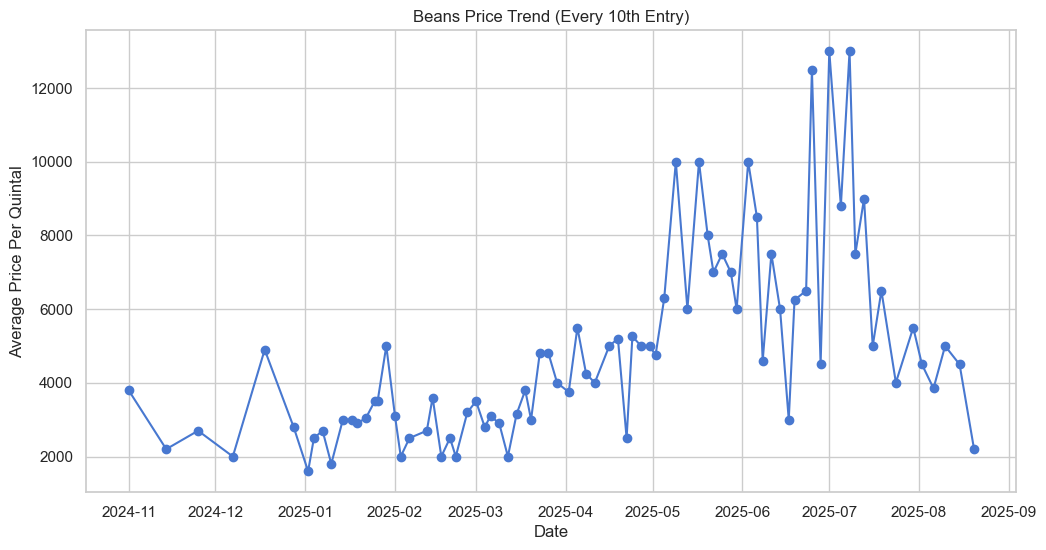

In [85]:
# Get unique varieties
# beans
subset = df[df["Variety"] == "Beans"].copy()
subset = subset.sort_values("Report_Date")

# take every 10th row
subset = subset.iloc[::10, :]

plt.figure(figsize=(12,6))
plt.plot(subset["Report_Date"], subset["Average_Price_Per_Quintal"], marker='o')
plt.title("Beans Price Trend (Every 10th Entry)")
plt.xlabel("Date")
plt.ylabel("Average Price Per Quintal")
plt.grid(True)
plt.show()


## Tomato Price Trend Over Time (per Quintal Vs 20kg)

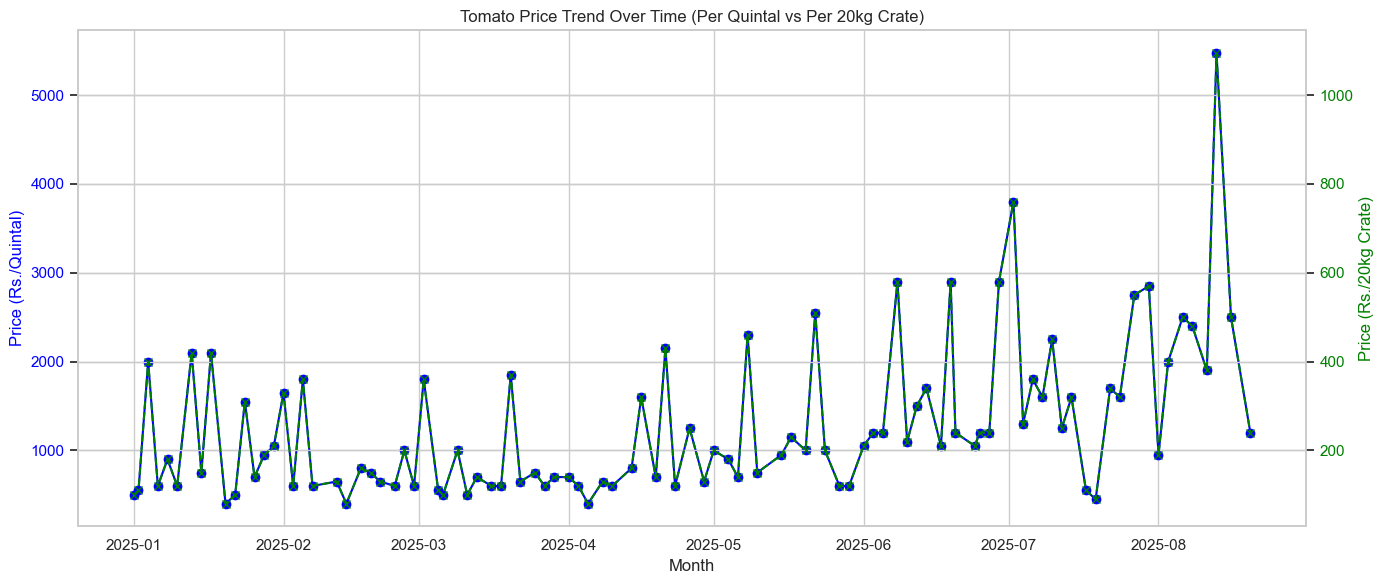

In [89]:
variety_name = "Tomato"

# Filter Tomato data
tomato_df = df[df["Variety"] == variety_name].copy()
tomato_df = tomato_df.sort_values("Report_Date")

# Downsample (every 10th entry to reduce clutter)
tomato_df = tomato_df.iloc[::10, :]

# Plot with secondary y-axis
fig, ax1 = plt.subplots(figsize=(14,6))

# Main y-axis: Price per Quintal
ax1.plot(tomato_df["Report_Date"], tomato_df["Average_Price_Per_Quintal"], 
         marker='o', color='blue', label="Price per Quintal")
ax1.set_xlabel("Month")
ax1.set_ylabel("Price (Rs./Quintal)", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Secondary y-axis: Price per 20kg crate
ax2 = ax1.twinx()
ax2.plot(tomato_df["Report_Date"], tomato_df["Average_Price_Per_Quintal"]/5, 
         marker='x', color='green', linestyle='--', label="Price per 20kg Crate")
ax2.set_ylabel("Price (Rs./20kg Crate)", color='green')
ax2.tick_params(axis='y', labelcolor='green')

plt.title("Tomato Price Trend Over Time (Per Quintal vs Per 20kg Crate)")
fig.tight_layout()
plt.show()

### Observation

- Tomato prices per quintal fluctuate heavily, making it difficult for farmers to judge the true selling price.

- By converting into 20kg crate prices (practical unit used by farmers), we clearly see the day-to-day earning potential per crate.

- Prices generally stayed between ₹200–₹600 per crate, with occasional spikes above ₹1000 (profitable windows).

- These spikes usually align with seasonal demand and supply shortages, meaning farmers who monitor trends can time their sales better.

# Market-wise Highest Arrival for All Varieties
- Farmers see which market is the biggest hub for each variety.

In [18]:

market_highest_arrival = (
    df.groupby(["Market_Name","Variety"])["Arrivals_Tonnes"]
    .max()
    .reset_index()
    .sort_values(by="Arrivals_Tonnes", ascending=False)
)
print(market_highest_arrival.head(10))


   Market_Name  Variety  Arrivals_Tonnes
12   Lasalgaon   Carrot           4026.0
22       Nasik  Cabbage           3820.0
13   Lasalgaon    Onion           3493.2
18     Manchar    Onion           2132.9
25       Nasik   Tomato           2001.5
20       Nasik    Beans           1288.0
24       Nasik   Potato           1177.5
27     Paithan    Onion            610.0
16     Manchar  Cabbage            600.0
23       Nasik   Garlic            354.6


# District-wise Average Price for One Commodity

C:\Users\chava\AppData\Local\Temp\ipykernel_5108\2762718669.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="District_Name", y="Average_Price_Per_Quintal", data=dist_avg_price, palette="crest")


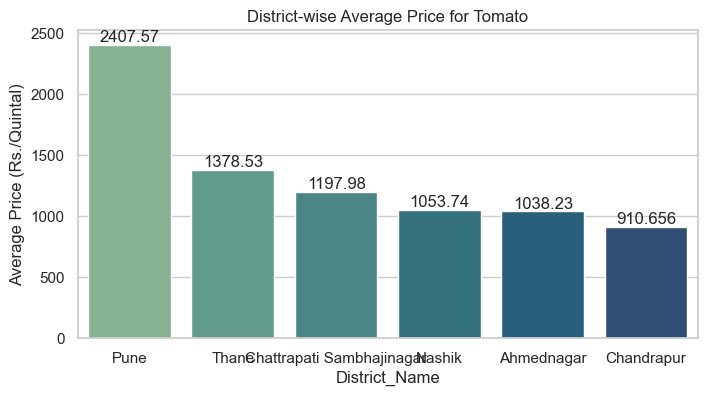

In [3]:
commodity = "Tomato"
dist_avg_price = (
    df[df["Variety"].str.lower() == commodity.lower()]
    .groupby("District_Name")["Average_Price_Per_Quintal"]
    .mean()
    .reset_index()
    .sort_values(by="Average_Price_Per_Quintal", ascending=False)
)

plt.figure(figsize=(8,4))
ax = sns.barplot(x="District_Name", y="Average_Price_Per_Quintal", data=dist_avg_price, palette="crest")
for i in ax.containers:
    ax.bar_label(i)
plt.xticks(rotation=0)
plt.title(f"District-wise Average Price for {commodity}")
plt.ylabel("Average Price (Rs./Quintal)")
plt.show()

# Market-wise Highest Arrival for All Varieties

In [4]:
market_highest_arrival = (
    df.groupby(["Market_Name","Variety"])["Arrivals_Tonnes"]
    .max()
    .reset_index()
    .sort_values(by="Arrivals_Tonnes", ascending=False)
)

In [5]:
df['Variety'].unique()

array(['Beans', 'Brinjal', 'Cabbage', 'Garlic', 'Onion', 'Red', 'Potato',
       'Tomato', 'Local'], dtype=object)

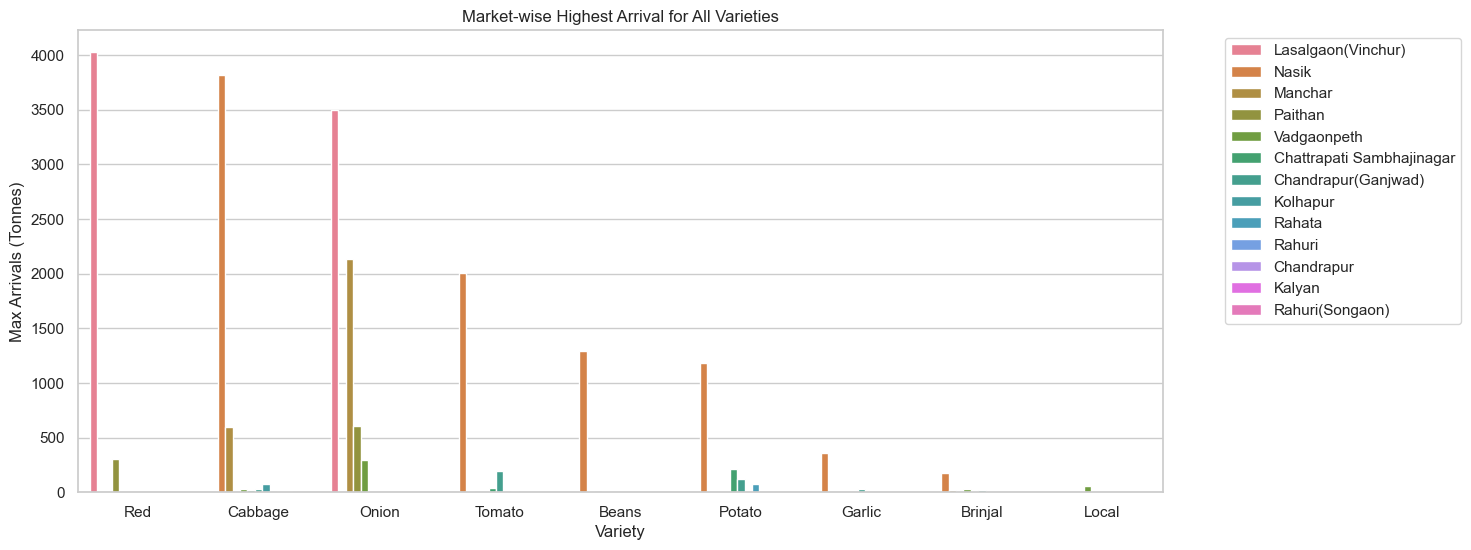

In [6]:
plt.figure(figsize=(14,6))
sns.barplot(x="Variety", y="Arrivals_Tonnes", hue="Market_Name", data=market_highest_arrival, dodge=True)
plt.xticks(rotation=0)
plt.title("Market-wise Highest Arrival for All Varieties")
plt.ylabel("Max Arrivals (Tonnes)")
plt.legend(bbox_to_anchor=(1.05,1), loc="upper left")
plt.show()

## observation
- Lasalgaon emerges as a major hub with exceptionally high arrivals of Carrot (~4000 tonnes) and Onion (~3500 tonnes), showing it is a critical market for bulky crops.
- Nashik dominates in multiple crops, especially Cabbage (~3800 tonnes), Tomato (~2000 tonnes), Beans (~1250 tonnes), and Potato (~1150 tonnes), proving its role as a diversified market.
- Paithan shows strong arrivals for Onion (~2100 tonnes), indicating localized concentration in onion production and trade.
- Other markets like Vadgaonpeth, Sambhajinagar, Kolhapur, Rahata, and Rahuri show relatively small contributions, suggesting they serve as secondary or regional markets with limited arrivals.
- Garlic, Brinjal, and Capsicum have much lower arrivals across all markets, showing they are niche crops with limited scale compared to staples like Onion, Cabbage, and Tomato

# Highest Price for All Varieties

C:\Users\chava\AppData\Local\Temp\ipykernel_5108\809042187.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Variety", y="Average_Price_Per_Quintal", data=highest_price, palette="Greens_r")


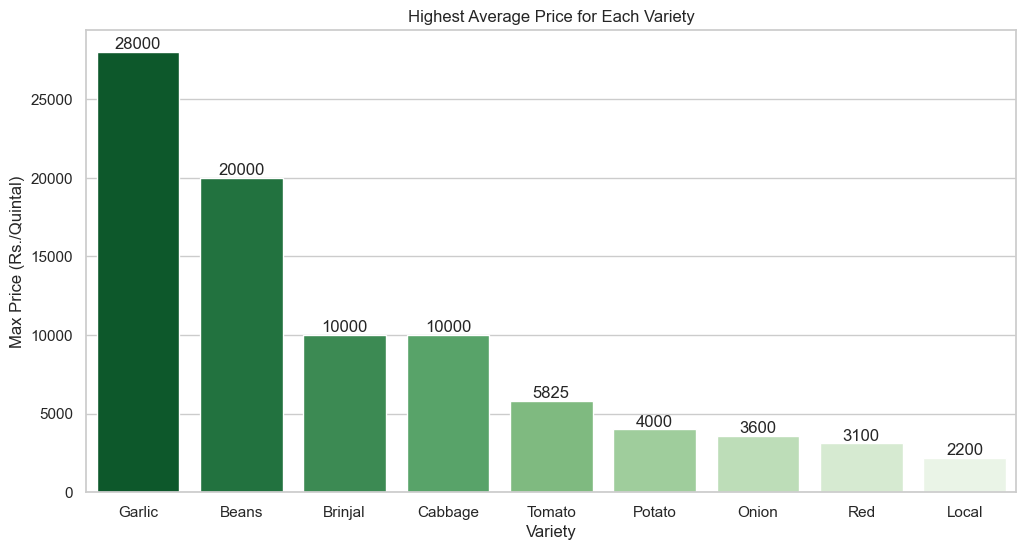

In [7]:
highest_price = (
    df.groupby("Variety")["Average_Price_Per_Quintal"]
    .max()
    .reset_index()
    .sort_values(by="Average_Price_Per_Quintal", ascending=False)
)

plt.figure(figsize=(12,6))
ax = sns.barplot(x="Variety", y="Average_Price_Per_Quintal", data=highest_price, palette="Greens_r")
for i in ax.containers:
    ax.bar_label(i)
    
plt.xticks(rotation=0)
plt.title("Highest Average Price for Each Variety")
plt.ylabel("Max Price (Rs./Quintal)")
plt.show()

# Arrivals (Tonnes) Summary

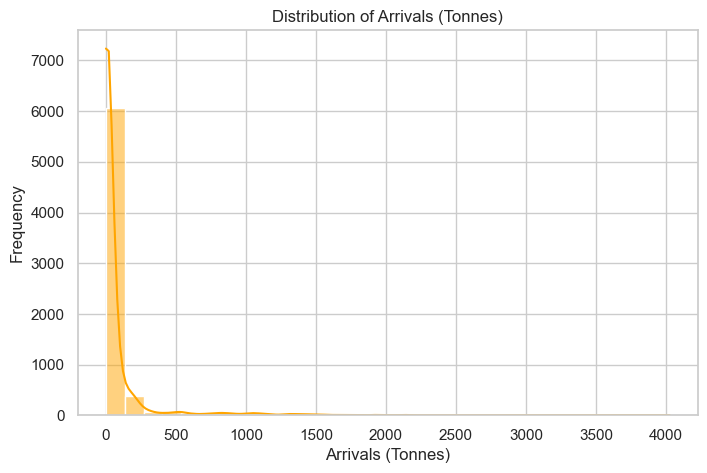

In [8]:
plt.figure(figsize=(8,5))
sns.histplot(df["Arrivals_Tonnes"], bins=30, kde=True, color="orange")
plt.title("Distribution of Arrivals (Tonnes)")
plt.xlabel("Arrivals (Tonnes)")
plt.ylabel("Frequency")
plt.show()

# District wise Average Price for all Commodities

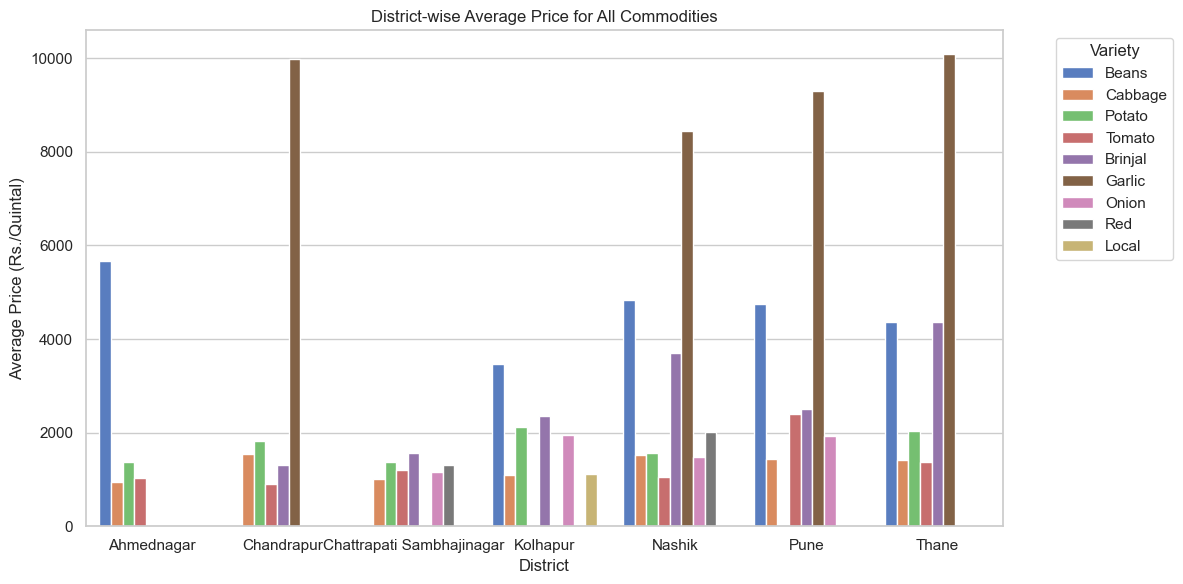

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by District and Variety to get average price
dist_avg_price = (
    df.groupby(["District_Name", "Variety"])["Average_Price_Per_Quintal"]
    .mean()
    .reset_index()
)

# Plot using seaborn
plt.figure(figsize=(12,6))
sns.barplot(
    data=dist_avg_price,
    x="District_Name",
    y="Average_Price_Per_Quintal",
    hue="Variety"
)
    
plt.title("District-wise Average Price for All Commodities")
plt.xlabel("District")
plt.ylabel("Average Price (Rs./Quintal)")
plt.xticks(rotation=0)
plt.legend(title="Variety", bbox_to_anchor=(1.05,1), loc="upper left")
plt.tight_layout()
plt.show()


# Average price per variety

C:\Users\chava\AppData\Local\Temp\ipykernel_5108\1528681821.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x="Variety", y="Average_Price_Per_Quintal",hue = 'Variety',palette="Reds_r", data=df, ci=None)


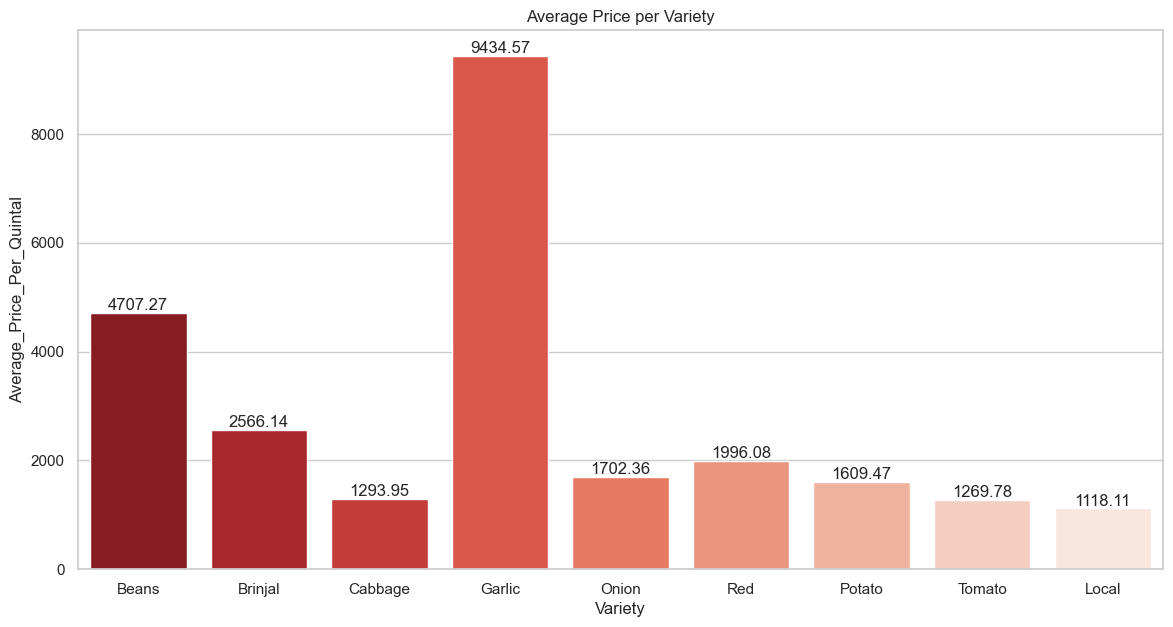

In [10]:
plt.figure(figsize=(14,7))
ax = sns.barplot(x="Variety", y="Average_Price_Per_Quintal",hue = 'Variety',palette="Reds_r", data=df, ci=None)
for i in ax.containers:
    ax.bar_label(i)
plt.xticks(rotation=0)
plt.title("Average Price per Variety")
plt.show()

## Observation
- Garlic has the highest average price, far above all other crops.
- Beans also fetch good prices, while Brinjal and Carrot are mid-range.
- Onion, Potato, Cabbage, Tomato, and Capsicum are the lowest-priced varieties.